# Question 13

Text(0.5, 1.0, 'harmonic oscillator wavefunctions')

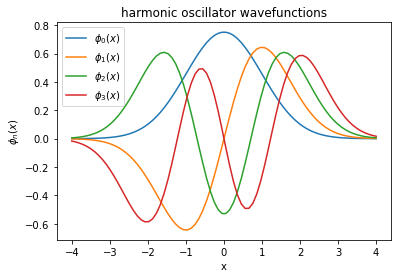

In [2]:
#part a

import math
import numpy as np
import matplotlib.pyplot as plt

def H(n,x):
    if(n==0):
        return 1
    if(n==1):
        return 2*x
    else:
        H=[1,2*x]
        for i in range(2,n+1):
            H.append(2*x*H[i-1]-2*(i-1)*H[i-2])
    return H[n]
    
def phi(n,x):
    val=(2**n)*(math.factorial(n))*(math.sqrt(math.pi))
    const=1/math.sqrt(val)
    return const*(math.exp(-(x**2/2)))*H(n,x)


x=np.linspace(-4,4,80)

phi_0=[]
phi_1=[]
phi_2=[]
phi_3=[]


for i in range(80):
    phi_0.append(phi(0,x[i]))
    phi_1.append(phi(1,x[i]))
    phi_2.append(phi(2,x[i]))
    phi_3.append(phi(3,x[i]))
    
plt.plot(x, phi_0, label="$\phi_0(x)$")
plt.plot(x, phi_1, label="$\phi_1(x)$")
plt.plot(x, phi_2, label="$\phi_2(x)$")
plt.plot(x, phi_3, label="$\phi_3(x)$")

#plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('$\phi_n(x)$')
plt.legend()
plt.title('harmonic oscillator wavefunctions')
    

Text(0.5, 1.0, '30th harmonic')

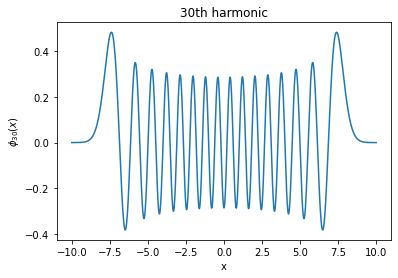

In [3]:
#part b

x=np.linspace(-10,10,1000)
phi30=[]

for i in range(1000):
    phi30.append(phi(30, x[i]))
    
plt.plot(x, phi30)
plt.xlabel('x')
plt.ylabel('$\phi_{30}(x)$')
plt.title('30th harmonic')

In [4]:
import numpy as np
import math
from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w



def error_func(x,n,phi):
    return (x**2)*((np.absolute(phi(n,x)))**2)

#We start from -1 to 1 then keep doubling until the value does not change beyond the chosen tolerance

N=100
def squared_error(l,n,phi):
    x,w=gaussxwab(N,-l,l)
    val=0
    for i in range(N):
        val+=(w[i])*(error_func(x[i],n,phi))
    return val

tolerance=1e-6

def Uncertainty(n,phi):
    l1=1
    l2=2
    while(np.absolute(squared_error(l2,n,phi)-squared_error(l1,n,phi))>tolerance):
        l1=l2
        l2*=2
    return l2

print('uncertainty in $\phi_{5}(0)$:', math.sqrt(squared_error(Uncertainty(5,phi),5,phi)))

    


uncertainty in $\phi_{5}(0)$: 2.345207875705646
